In [1]:
from ROOT import (
    TTree,
    TH1D,
    TFormula,
    TCanvas,
    TFile,
    TH1,
    TF1,
    TH1F,
    TH2F,
    TGraph2D,
    TRandom,
    gStyle,
    gRandom,
    kBlue
)
from math import sin
import ctypes
import numpy as np

Welcome to JupyROOT 6.30/01


In [2]:
rootFile  = TFile("test.root", "recreate")

In [3]:
myFormula1 = TFormula("myFormula1","[0]*x^2")
p1 = 2
myFormula1.SetParameter(0,p1)

In [4]:
# TF1 参数2是定义的函数
sqroot = TF1("sqroot", "myFormula1")

c1 = TCanvas("c1", "2x^2", 600, 600)
h1d1 = TH1D("h1d1", "2x^2", 200, -7, 7)
h1d1.FillRandom("sqroot", 10000)
h1d1.Fit("sqroot")  # 函数拟合
h1d1.Draw()
c1.Draw()

%jsroot on

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      189.645
NDf                       =          190
Edm                       =  3.57093e-17
NCalls                    =           13
p0                        =      3.00377   +/-   0.0303266   


In [9]:
gStyle.SetHistMinimumZero()
c2 = TCanvas("c2", "c2", 800, 600)
c2.Divide(2, 1)
hz1 = TH1F("hz1", "Bar-chart drawn from 0", 20, -3, 3)
hz2 = TH2F("hz2", "Lego plot drawn from 0", 20, -3, 3, 20, -3, 3)
hz1.SetFillColor(kBlue)
hz2.SetFillColor(kBlue)
for i in range(10000):
    x = gRandom.Gaus(0, 1)
    y = gRandom.Gaus(0, 1)
    if x > 0:
        hz1.Fill(x, 1)
        hz2.Fill(x, y, 1)
    else:
        hz1.Fill(x, -1)  # 权重为-1
        hz2.Fill(x, y, -2)  # 权重为 -2

# "min0"是一个选项，它指示ROOT将Y轴的最小值锁定为0。
# 这意味着无论2维直方图中的数据如何分布，Y轴的最小值都将设置为0，以确保立体图的底部始终从0开始。
c2.cd(1)
# "bar2"表示绘制直方图的方式。指将每个箱子用一根垂直的条形来表示。
hz1.Draw("bar2 min0")

c2.cd(2)
# "lego1"表示绘制直方图的方式。将每个箱子用一个立体块来表示。这种绘图方式通常用于可视化2维数据分布。
hz2.Draw("lego1 min0")

c2.Draw()
%jsroot on

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: hz1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hz2 (Potential memory leak).


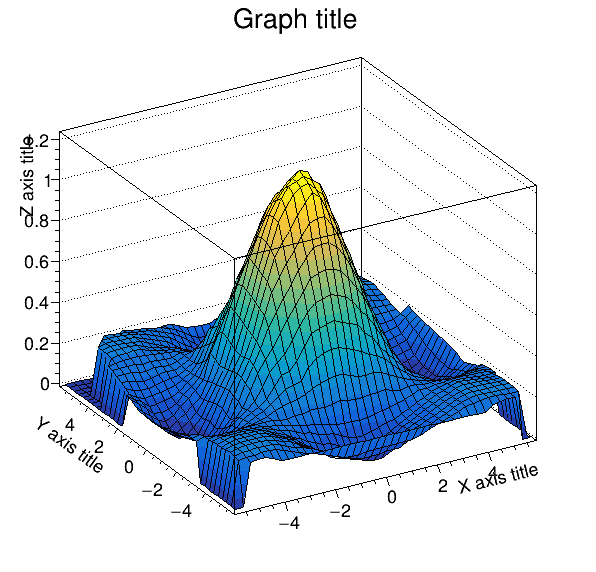

In [6]:
c3 = TCanvas("c3", "c3", 600, 600)
x, y, z, P = 6.0, 6.0, 6.0, 6.0
np = 200
g2 = TGraph2D()
g2.SetTitle("Graph title; X axis title; Y axis title; Z axis title")
r = TRandom()
for N in range(np):
    x = 2 * P * (r.Rndm(N)) - P
    y = 2 * P * (r.Rndm(N)) - P
    z = (sin(x) / x) * (sin(y) / y) + 0.2
    g2.SetPoint(N, x, y, z)  # N指序号
g2.Draw("surf1")
c3.Draw()
g2.Write()
# rootFile.Write()
%jsroot off

In [7]:
rootFile.Write()

4955